In [42]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [43]:
# Define dataset path
dataset_path = "../input/fruits/fruits-360_100x100/fruits-360/Training"
test_path = "../input/fruits/fruits-360_100x100/fruits-360/Test"

In [44]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 72019 images belonging to 176 classes.
Found 17939 images belonging to 176 classes.


In [45]:
# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Callbacks
checkpoint = ModelCheckpoint('fruit_classifier.keras', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [52]:
# Train Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    verbose=1,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/20
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 525s 233ms/step - accuracy: 0.4904 - loss: 1.6675 - val_accuracy: 0.8105 - val_loss: 0.5711
Epoch 2/20
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 335s 148ms/step - accuracy: 0.8108 - loss: 0.5606 - val_accuracy: 0.8603 - val_loss: 0.4205
Epoch 3/20
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 348s 154ms/step - accuracy: 0.8652 - loss: 0.4045 - val_accuracy: 0.9065 - val_loss: 0.3202
Epoch 4/20
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 350s 155ms/step - accuracy: 0.8915 - loss: 0.3229 - val_accuracy: 0.9155 - val_loss: 0.2582
Epoch 5/20
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 323s 143ms/step - accuracy: 0.9049 - loss: 0.2851 - val_accuracy: 0.9249 - val_loss: 0.2780
Epoch 6/20
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 347s 154ms/step - accuracy: 0.9148 - loss: 0.2585 - val_accuracy: 0.9288 - val_loss: 0.2688
Epoch 7/20
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 339s 150ms/step - accuracy: 0.9279 - loss: 0.2166 - val_accuracy: 0.9303 - val_loss: 0.2618
Epoch 8/20
2251/2251 ━━━━━━━━━━━━━━━━━━━━ 366s 162ms/step - ac

In [63]:
# Save Model
model.save("fruit_classifier_final.keras")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

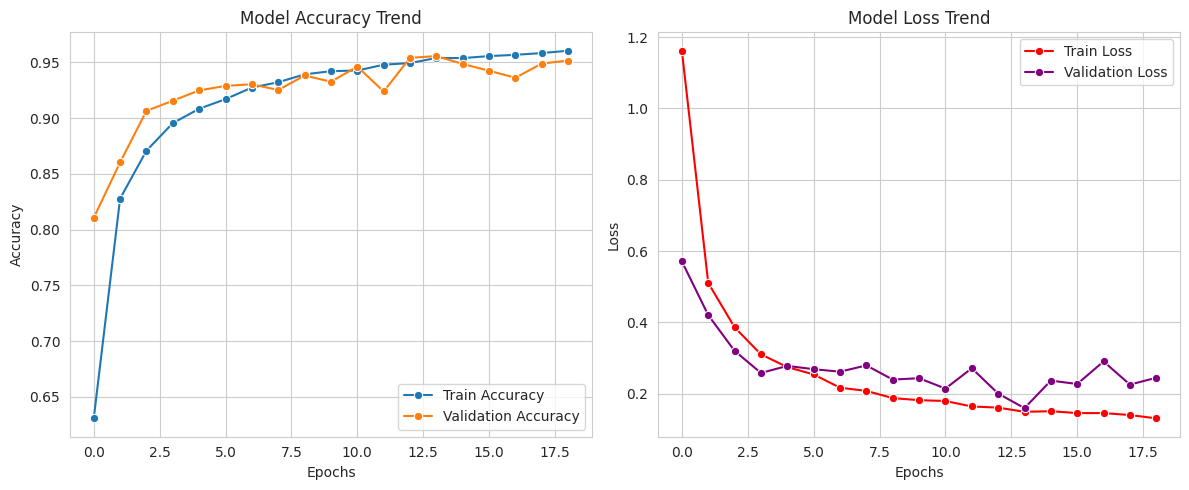

In [61]:
# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history.history['accuracy'], label='Train Accuracy', marker='o')
sns.lineplot(data=history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Trend')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(data=history.history['loss'], label='Train Loss', marker='o', color='red')
sns.lineplot(data=history.history['val_loss'], label='Validation Loss', marker='o', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Trend')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 29990 images belonging to 175 classes.


In [67]:
# Predict on Test Data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

938/938 ━━━━━━━━━━━━━━━━━━━━ 293s 312ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


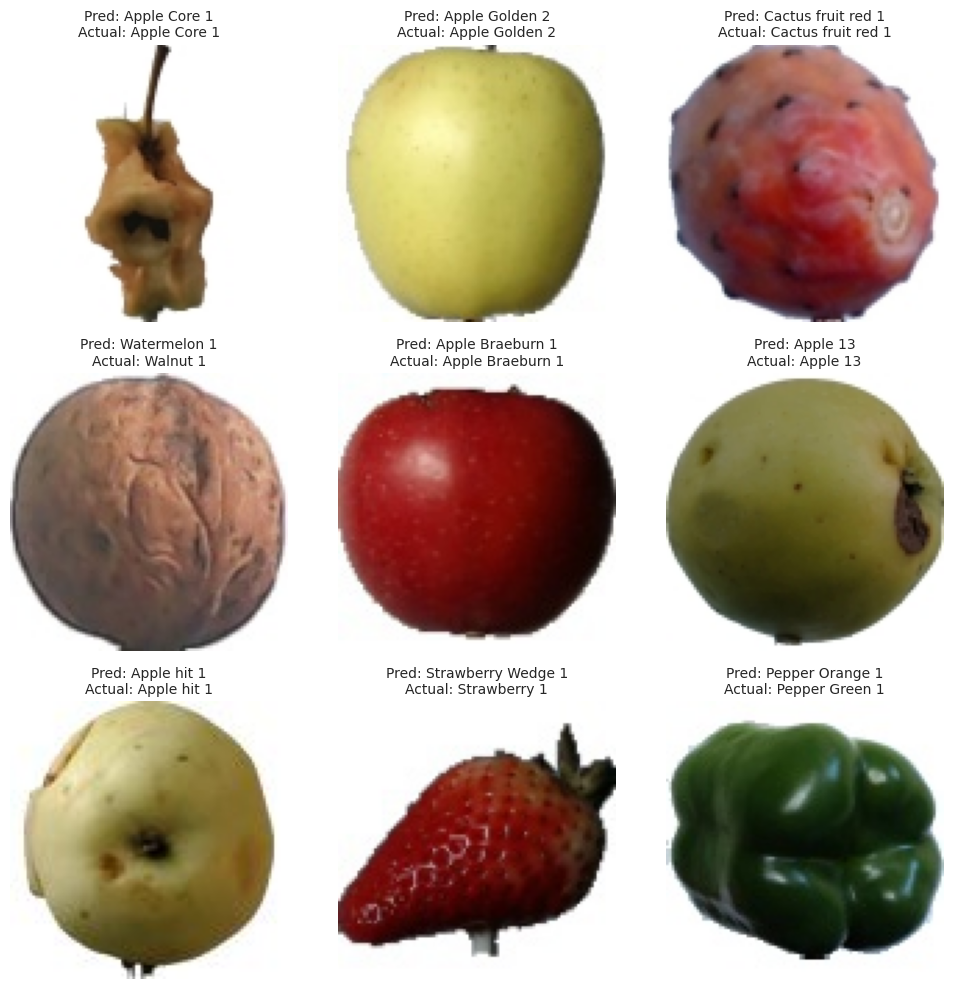

In [93]:
# Show Some Predictions
import random
model = tf.keras.models.load_model('fruit_classifier.keras')
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for ax in axes.flatten():
    idx = random.randint(0, len(test_generator.filenames)-1)
    img_path = os.path.join(test_path, test_generator.filenames[idx])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(100, 100))
    img_array = tf.keras.preprocessing.image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred_class = class_labels[np.argmax(model.predict(img_array))]
    true_class = class_labels[y_true_classes[idx]]
    ax.imshow(img)
    ax.set_title(f"Pred: {pred_class}\nActual: {true_class}", fontsize=10)
    ax.axis("off")
plt.tight_layout()
plt.show()